#Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Load Data

In [2]:
path = '/content/DG_out.csv'
# Use chunk_size for reading large files or datasets
chunk_size = 10000
reader = pd.read_csv(path, chunksize=chunk_size)
result_list = []
for chunk in reader:
 result = chunk.drop (['tx_hash', 'in_malicious', 'out_malicious', 'is_malicious', 'all_malicious'], axis=1)
 # Save result in list
 result_list.append(result)
# Join chunks together
final_result = pd.concat(result_list)


In [17]:
final_result.head()

,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc,out_and_tx_malicious
0,0,1,0.0,50.0,50.0,0.0,50.0,0
1,1,2,50.0,50.0,100.0,50.0,25.0,0
2,1,1,10.0,10.0,20.0,10.0,10.0,0
3,1,1,40.0,30.0,70.0,40.0,30.0,0
4,1,2,30.0,30.0,60.0,30.0,15.0,0


In [11]:
if final_result.isnull().any().any():
  print ('There are null values in dataset')
else:
  print ('There are not null values in dataset')

There are not null values in dataset


In [5]:
X = final_result.drop('out_and_tx_malicious', axis = 1)
y = final_result['out_and_tx_malicious']

In [15]:
y.value_counts()

0    30248026
1         108
Name: out_and_tx_malicious, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
print ('y_train:', Counter(y_train))
print ('y_test:', Counter(y_test))

y_train: Counter({0: 24198429, 1: 78})
y_test: Counter({0: 6049597, 1: 30})


# Exploratory Data Analysis (EDA)

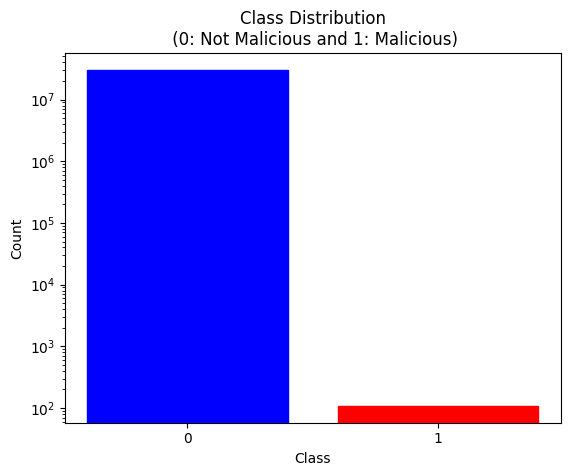

In [19]:
chart = plt.bar(['0','1'], list (y.value_counts()))
chart[0].set_color('b')
chart[1].set_color('r')
plt.xlabel('Class')
plt.ylabel('Count')
plt.yscale('log')
plt.title ('Class Distribution\n (0: Not Malicious and 1: Malicious)')
plt.show()

In [18]:
pd.options.display.float_format = '{:.3f}'.format
X.describe()

,indegree,outdegree,in_btc,out_btc,total_btc,mean_in_btc,mean_out_btc
count,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000,30248134.000
mean,2.149,2.149,54.842,54.842,109.683,49.240,28.771
std,7.421,4.512,1303.303,1301.473,2602.527,972.921,712.557
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.000,2.000,0.100,0.099,0.206,0.064,0.050
50%,1.000,2.000,0.932,0.959,1.965,0.535,0.490
75%,2.000,2.000,8.592,9.064,18.400,5.614,4.519
max,1932.000,1322.000,550000.000,500020.700,1050000.000,499259.588,500000.000


In [25]:
def plot_distribution(X):
  fig, axs = plt.subplots(3, 3, figsize = (15,15))
  fig.delaxes(axs[2,1])
  fig.delaxes(axs[2,2])
  n = 0
  for i in range (3):
    for j in range (3):
      axs[i,j].hist(X[X.columns[3*i+j]], bins=200, log=True)
      axs[i,j].grid()
      n +=1
      if n == 7:
        break
  plt.show()

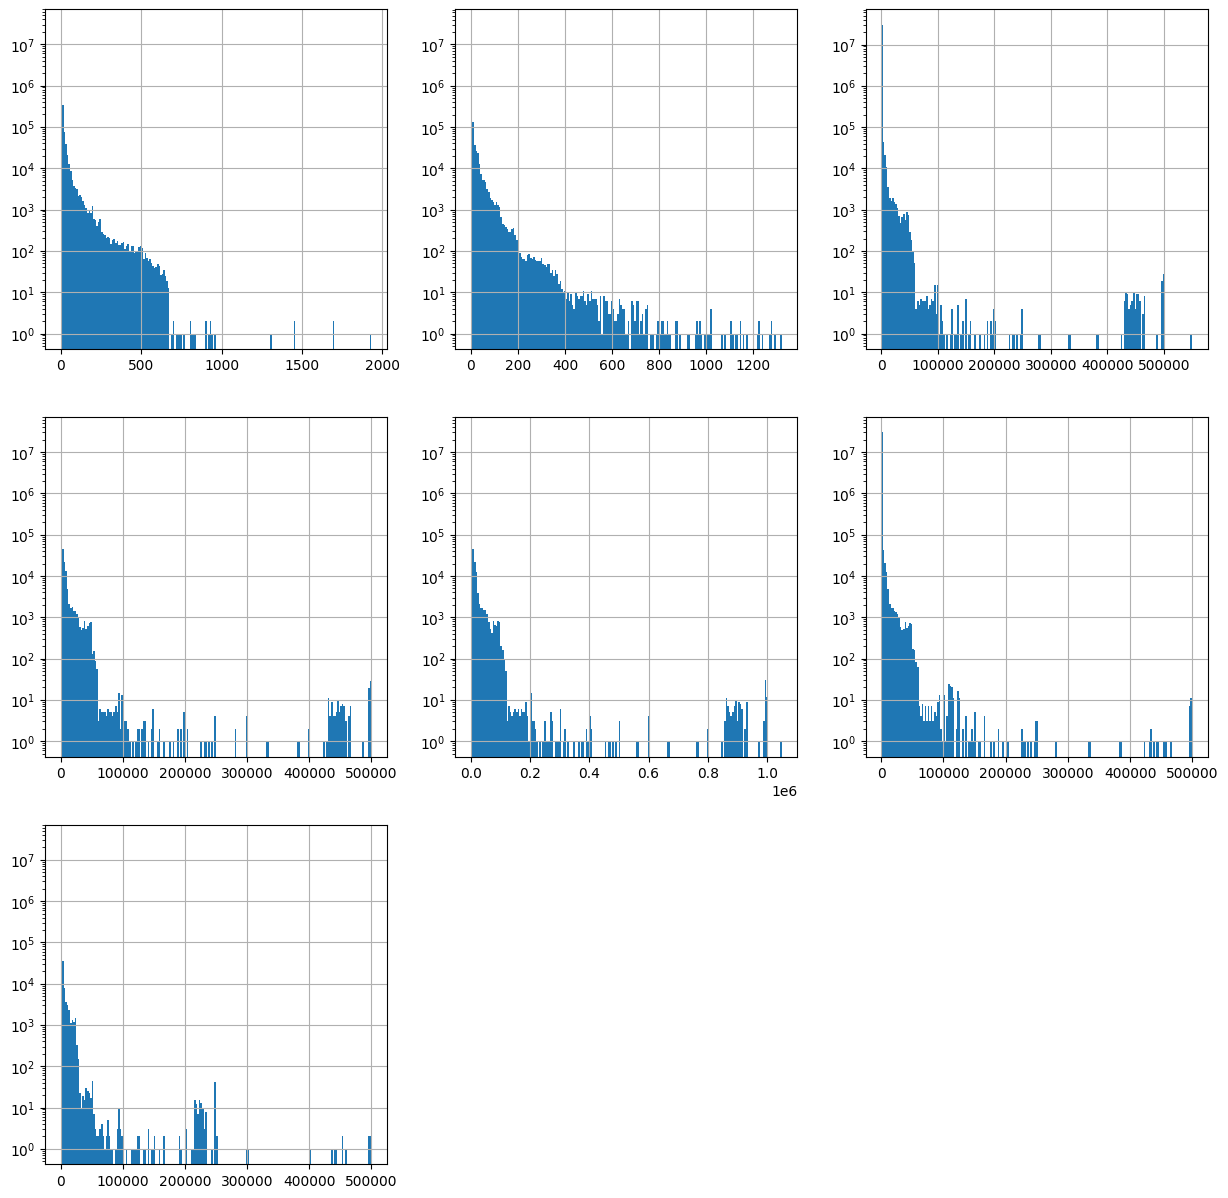

In [26]:
plot_distribution(X)

All variables of the data highly follow a right-skewed distribution.  Transformations to reduce the right-skewness of the data include square root and log.

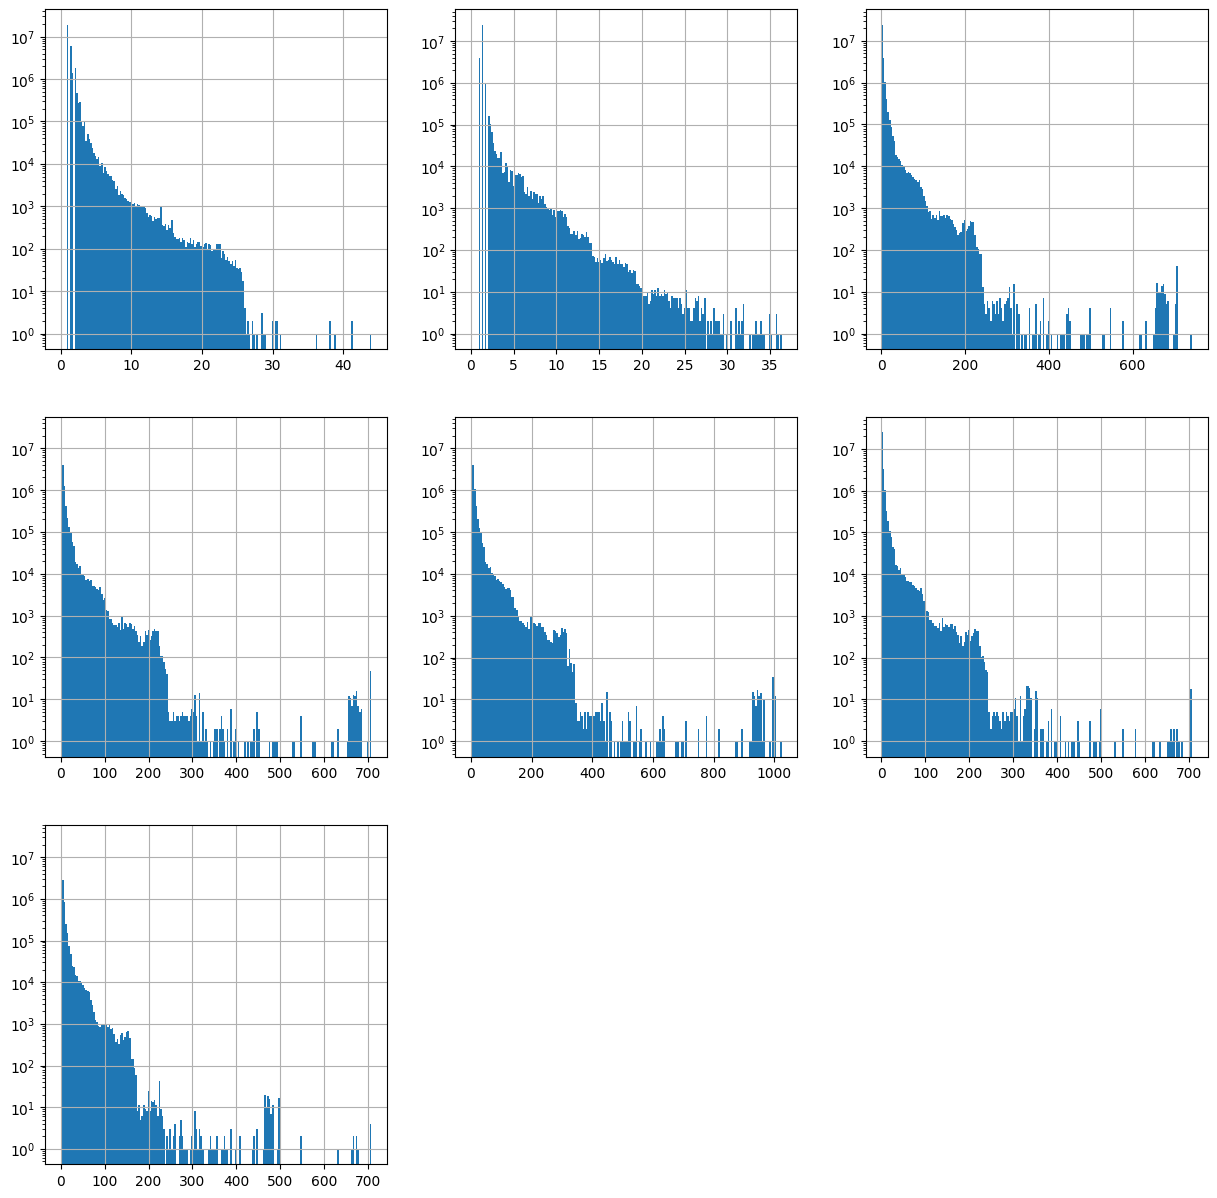

In [29]:
plot_distribution(np.sqrt(X))

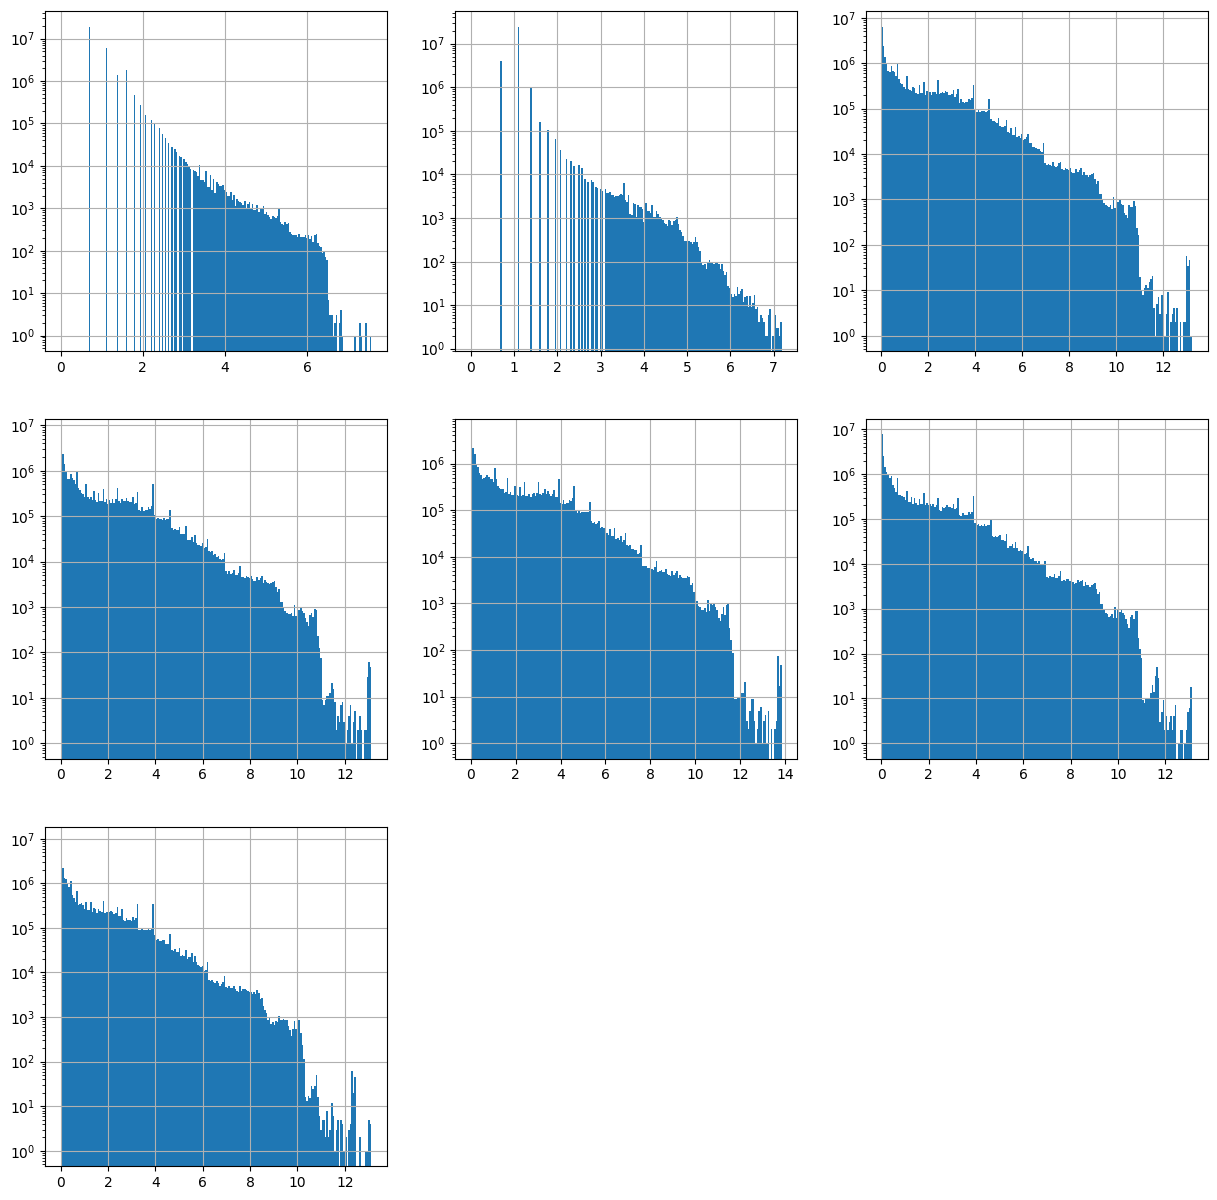

In [8]:
plot_distribution(np.log1p(X))